In [1]:
import pandas as pd

coste_paciente, per revista.xlsx datos_analisis2 - english.xlsx

In [2]:
path = "../dataset/"
cost_path = path + "coste_paciente, per revista.xlsx" 
analysis_path = path + "datos_analisis2 - english.xlsx" 

In [3]:
cost_df = pd.read_excel(cost_path)
cost_df.head()

,ID CODE,Nurse costs,Dressing costs,Material costs,Secondary costs,Total costs,Dressing type
0,10001,29.250,73.8,8.576,0.0,111.626,Hydrocolloid
1,30001,38.775,73.8,9.664,0.0,122.239,Hydrocolloid
2,30003,15.000,69.7,3.535,0.0,88.235,Hydrocolloid
3,30005,46.250,NaN,8.140,0.0,54.390,Hydrocolloid
4,30006,18.750,57.4,1.682,0.0,77.832,Hydrocolloid


In [4]:
analysis_df = pd.read_excel(analysis_path)
analysis_df.head()

,ID code,Sex,Age,Baseline visit,num. visit,Dressing type,Ulcer_stage,"Cured: 1, no cured: 2",infected,Postural changes,red_friccion,Avoided_infecion,Braden Scale,Push Scale,porc_postural changes,porc_friccion,porc_infec,Loss to follow up,Location
0,270009,Female,86,2015-09-11,2.0,Hydrocellular,1,2,2,0,0,0,Riesgo moderado,15,NaN,NaN,NaN,2,Trochanter
1,470003,Female,92,2014-09-19,2.0,Hydrocellular,2,2,2,0,0,0,Riesgo moderado,4,NaN,NaN,NaN,1,Trochanter
2,30006,Female,88,2014-06-03,2.0,Hydrocolloid,2,2,1,0,0,0,Riesgo moderado,6,NaN,NaN,NaN,2,Trochanter
3,100005,Female,91,2014-03-11,3.0,Hydrocolloid,1,2,2,1,1,1,Riesgo moderado,12,1.0,1.0,1.0,2,Trochanter
4,100011,Female,86,2015-09-28,4.0,Hydrocolloid,1,2,2,2,2,0,Sin riesgo,6,1.0,1.0,0.0,2,Trochanter


In [12]:
cost_df.groupby('Dressing type')['Total costs'].describe()

,count,mean,std,min,25%,50%,75%,max
Dressing type,,,,,,,,
Hydrocellular,84.0,87.103585,41.212625,9.408,56.14618,83.33694,102.50854,237.02200
Hydrocolloid,85.0,93.604625,56.708847,13.386,60.91600,85.20000,115.40200,361.60116


Dressing type
Hydrocellular    Axes(0.125,0.11;0.775x0.77)
Hydrocolloid     Axes(0.125,0.11;0.775x0.77)
Name: Total costs, dtype: object

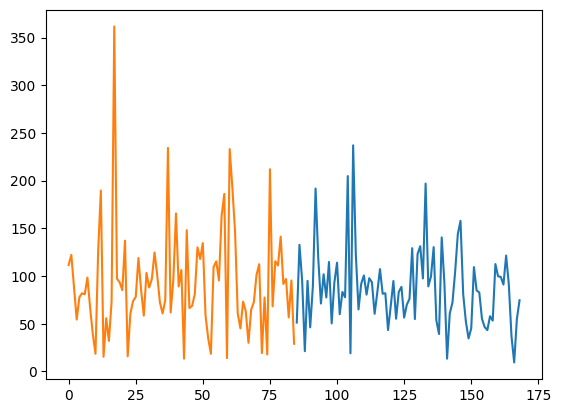

In [28]:
cost_df.groupby('Dressing type')['Total costs'].plot()

<Axes: >

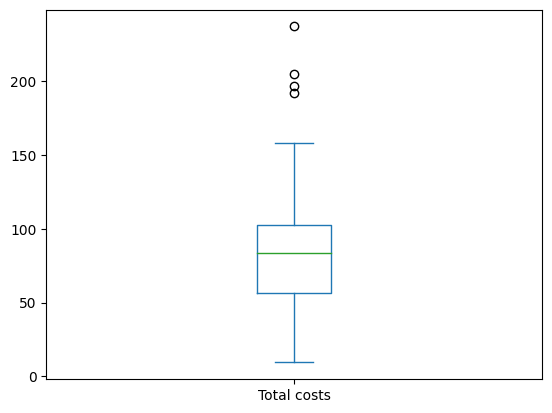

In [33]:
cost_df.loc[cost_df['Dressing type'] == 'Hydrocellular']['Total costs'].plot.box()

<Axes: >

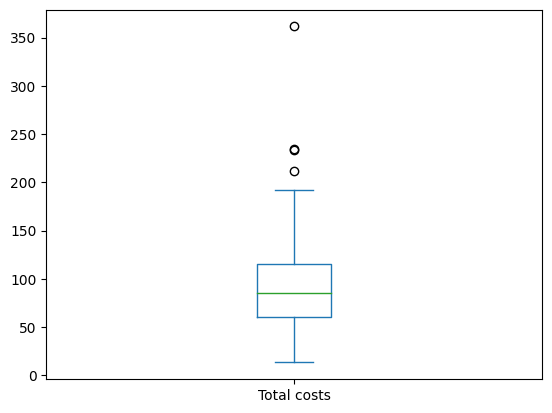

In [34]:
cost_df.loc[cost_df['Dressing type'] == 'Hydrocolloid']['Total costs'].plot.box()